PostgreSQL connection is closed
PostgreSQL connection is closed



Support Vector Machine



Score :0.9100749375520399





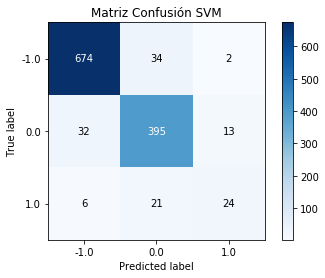

In [33]:
import psycopg2
import sys, nltk, re, string, heapq, gensim
from nltk.corpus import stopwords
from psycopg2 import Error
import math
from matplotlib import pyplot as plt
import pandas as pd
import pandas.io.sql as sqlio

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

import numpy as np

def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection

def obtenerTweets(tabla):

    try:
        
        connection = crearConexion()
        query = """
                SELECT clasificacion, sentimiento, caso_villarejo, futbol, mayusculas,
                lista_palabras_positivas, lista_palabras_negativas, emoticonos_buenos,
                emoticonos_malos FROM %s;
                """ % (tabla)
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def main():
    
    training_tweets = obtenerTweets("training_set")
    testing_tweets = obtenerTweets("testing_set")
    
    x_training_tweets = training_tweets.drop(columns = ['clasificacion'])
    y_training_tweets = training_tweets['clasificacion']
    x_testing_tweets = testing_tweets.drop(columns = ['clasificacion'])
    y_testing_tweets = testing_tweets['clasificacion']
    
    gamma = np.linspace(0.0, 1.0, num=10)
    C = [int(x) for x in np.linspace(start = 0, stop = 10000, num = 100)]
        
    random_grid = {'gamma': gamma,
                   'C': C}
    
    #modelo_svm = SVC(kernel = 'rbf')
    
    #Buscamos todas las combinaciones posibles
    #rf_random = RandomizedSearchCV(estimator = modelo_svm, 
    #                               param_distributions = random_grid, 
    #                               n_iter = 20)
    
    #Entrenamos el modelo con las posibles combinaciones.
    #rf_random.fit(x_training_tweets, y_training_tweets)
    
    #Obtenemos los parametros con mejor resultado
    #print(rf_random.best_params_)
    #{'gamma': 1, 'C': 100}
    
    modelo_svm = SVC(kernel = 'rbf',
                    gamma = 1,
                    C = 100)
        
    modelo_svm.fit(x_training_tweets, y_training_tweets)
    
    score = modelo_svm.score(x_testing_tweets, y_testing_tweets)
    predicciones = modelo_svm.predict(x_testing_tweets)
    
    print('\n\n')
    print("Support Vector Machine")
    print('\n\n')
    print("Score :" + str(score))
    print('\n\n')
    
    skplt.metrics.plot_confusion_matrix(y_testing_tweets,
                                        predicciones,
                                        title = "Matriz Confusión SVM",
                                        normalize=False)
    plt.show()

    
if __name__ == '__main__':
    main()



